# Exploratory Data Analysis 
## Study on Factors Affecting Country’s Growth

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
import sklearn.decomposition

### Reading of the Dataset

In [2]:
missing_values =["N/a", "na", np.nan, "", 0, "NaN"]
cereal_data = pd.read_csv("cereal-yield-vs-gdp-per-capita.csv",na_values = missing_values)
energy_data = pd.read_csv("electricity-generation.csv",na_values = missing_values)
meat_data =pd.read_csv("meat-consumption-vs-gdp-per-capita.csv", na_values = missing_values)
health_data =pd.read_csv("healthcare-expenditure-vs-gdp.csv",na_values = missing_values)


### Cleaning the dataset(1):
 - Filtering by only required scope (year of  1990 to 2015)
 - Removing unwanted columns

In [3]:

# Removing unwanted Columns
energy_data = energy_data[energy_data.Year >= 1990]

meat_data = meat_data.drop(['Entity','GDP ','Population', 'Continent'],axis =1)
meat_data = meat_data[meat_data.Year >=1990]

health_data = health_data.drop(['Entity','Population', 'Continent'],axis =1)
health_data = health_data[health_data.Year >= 1990]
# 1990 to 2000 is not present

cereal_data = cereal_data.drop(['Entity','Population','GDP ', 'Continent'],axis =1)
cereal_data = cereal_data[cereal_data.Year >= 1990]



### Merging of all the dataset

In [4]:
# merging of dataset
data = pd.merge(pd.merge(pd.merge(energy_data , meat_data, on=['Code', 'Year']), health_data , on=['Code' , 'Year']),cereal_data , on=['Code' , 'Year'])
data.head()


,Entity,Code,Year,Electricity(TWh),Meat_quantity,health_expenditure,GDP,Cereal yield
0,Albania,ALB,1990,3.30,17.00,NaN,2548.112549,2794.399902
1,Albania,ALB,1991,3.82,20.61,NaN,1908.095337,2071.899902
2,Albania,ALB,1992,3.40,20.07,NaN,1822.334717,2158.600098
3,Albania,ALB,1993,3.53,22.12,NaN,2056.373047,2685.000000
4,Albania,ALB,1994,3.94,24.94,NaN,2288.676025,2460.899902


### Training set for exploratory analysis:
 - For visualization purpose we select 5 countries with good GDP and 1 country with lower value of GDP for a contrast in analysis

In [5]:
data =data.loc[data['Code'].isin(["IND","USA","FRA","DEU","JPN","COG"])]             # add countries of your choice. 
pd.set_option('display.max_rows', 500)             
data.head()

,Entity,Code,Year,Electricity(TWh),Meat_quantity,health_expenditure,GDP,Cereal yield
27630884,Congo,COG,2000,0.29,14.60,57.380070,3699.228516,753.900024
27630885,Congo,COG,2001,0.33,12.83,82.970512,3813.747803,775.000000
27630886,Congo,COG,2002,0.39,14.95,67.666100,3938.432129,772.000000
27630887,Congo,COG,2003,0.40,21.28,76.136498,3929.600098,780.700012
27630888,Congo,COG,2004,0.39,20.38,78.134689,4052.513184,776.400024


#### Exploring the amount of raw economic growth in countries between the year 1990 and 2020:

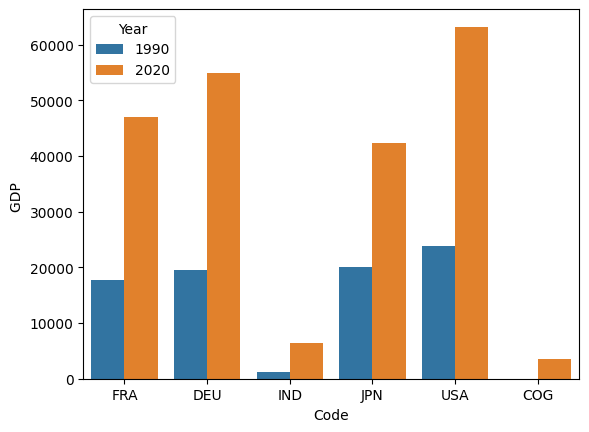

The compound annual growth rate of France is 0.03319
The compound annual growth rate of India is 0.05793
The compound annual growth rate of Germany is 0.03515
The compound annual growth rate of United States is 0.03297
The compound annual growth rate of Japan is 0.02540


In [6]:
compare_data1 = data[data.Year == 1990]
compare_data2 = data[data.Year == 2020]
frames = [compare_data1, compare_data2]
compare_data =pd.concat(frames)
sns.barplot(x = 'Code', y = 'GDP ', hue = 'Year', data = compare_data)
plt.show()

def gwth(data,country):
    for each in country:
        val1 = data.loc[data['Year']==1990]
        val1 = val1.loc[val1['Entity']==each]
        val2 = data.loc[data['Year']==2020]
        val2 = val2.loc[val2['Entity']==each]
        growth = ((float(val2['GDP '])/val1['GDP '])**(1/30))-1
        print(f"The compound annual growth rate of {each} is {float(growth):.5f}")

gwth(compare_data,['France','India','Germany','United States','Japan'])




The above graph shows us India has the highest growth rate of the 6 countries, Congo the least GDP and USA the highest.

### Cleaning the dataset(2):

In [7]:
data["Meat_quantity"] = data.groupby('Entity')['Meat_quantity'].transform(lambda x: x.ffill().bfill())
data["health_expenditure"] = data.groupby('Entity')['health_expenditure'].transform(lambda x: x.ffill().bfill())
data["Electricity(TWh)"] = data.groupby('Entity')['Electricity(TWh)'].transform(lambda x: x.ffill().bfill())
data["Cereal yield "] = data.groupby('Entity')['Cereal yield '].transform(lambda x: x.ffill().bfill())
data["GDP "] = data.groupby('Entity')['GDP '].transform(lambda x: x.ffill().bfill())


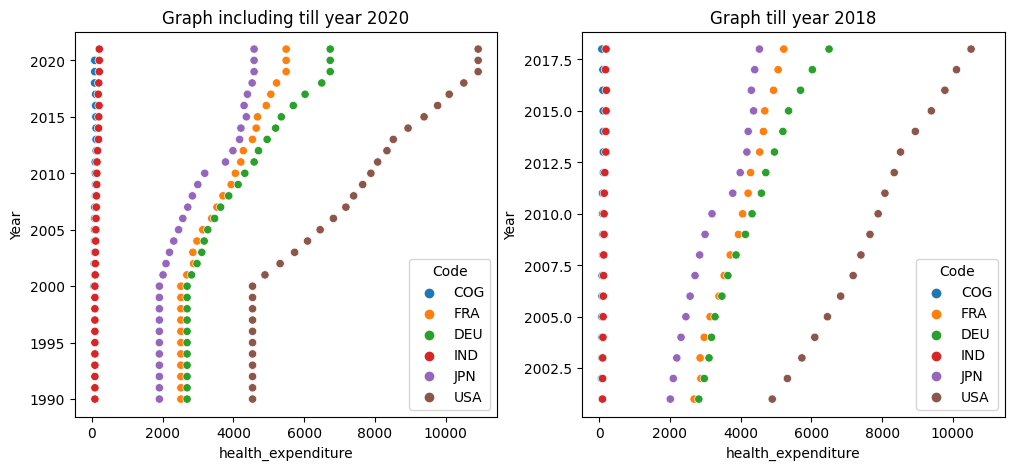

In [8]:
pltdata = data[(data['Year'] > 2000) & (data['Year'] <= 2018)]
pltdata.set_index('Entity')
fig, ax =plt.subplots(1,2,sharex=True,figsize=(12,5))
ax[0].set_title('Graph including till year 2020')
ax[1].set_title('Graph till year 2018')
sns.scatterplot(    ax=ax[0],
                    x="health_expenditure",
                    y="Year",
                    hue="Code",
                    data=data)
sns.scatterplot(    ax=ax[1],
                    x="health_expenditure",
                    y="Year",
                    hue="Code",
                    data=pltdata)                    
plt.show()

- From the above graph we can infer that the data above 2018 and below 2000 for health expenditure is almost equal, Working on these kind of data set is generally not prefered.
- This happens due to missing value in the graph or inconsistency in multiple economy from 2019 due to Covid-19. 
- So we will try to trim the dataset.

##### Checking for Null value after trimming

In [9]:
print("Null Values: ")
print(data.isnull().sum())
print(data)

Null Values: 
Entity                0
Code                  0
Year                  0
Electricity(TWh)      0
Meat_quantity         0
health_expenditure    0
GDP                   0
Cereal yield          0
dtype: int64
                 Entity Code  Year  Electricity(TWh)  Meat_quantity  \
27630884          Congo  COG  2000          0.290000          14.60   
27630885          Congo  COG  2001          0.330000          12.83   
27630886          Congo  COG  2002          0.390000          14.95   
27630887          Congo  COG  2003          0.400000          21.28   
27630888          Congo  COG  2004          0.390000          20.38   
27630889          Congo  COG  2005          0.420000          15.70   
27630890          Congo  COG  2006          0.440000          19.36   
27630891          Congo  COG  2007          0.400000          21.75   
27630892          Congo  COG  2008          0.480000          21.62   
27630893          Congo  COG  2009          0.520000          23.60   


 - No null values in the Dataset and no inconsistencies from the plot due to trimming.

### Exploring the various data and distribution amongst these countries

##### Electricity

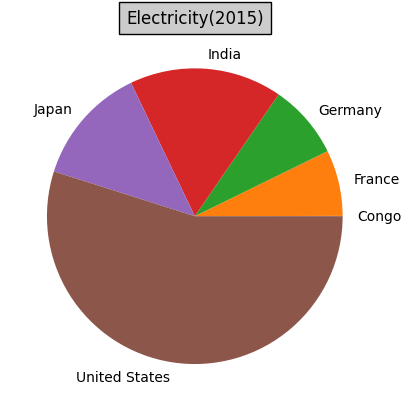

In [10]:
pie_data = data[data.Year == 2015]
pie_data =pie_data.set_index('Code')

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["Electricity(TWh)"], labels=pie_data['Entity'], )
plt.title("Electricity(2015)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


##### Meat Production

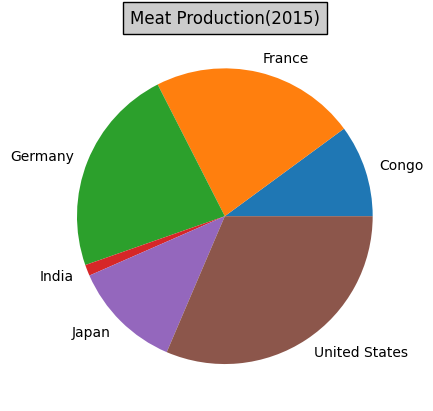

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["Meat_quantity"], labels=pie_data['Entity'])
plt.title("Meat Production(2015)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

##### Yield Of Wheat

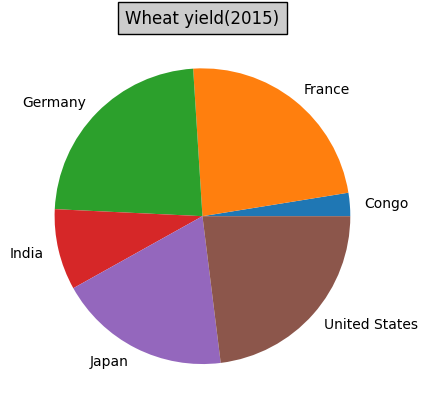

In [12]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["Cereal yield "], labels=pie_data['Entity'])
plt.title("Wheat yield(2015)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

##### Healthcare Expenses

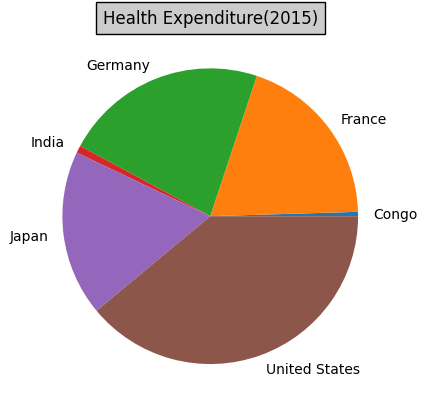

In [13]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.Circle( (3,8), 0.9, color='white')
plt.pie(pie_data["health_expenditure"], labels=pie_data['Entity'])
plt.title("Health Expenditure(2015)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

##### Summary:
- The electricity consumption of US is a giant comparatively to the rest of the countries.
- As far as meat consumption goes India is way behind these countries. This could be due to the fact tht india ha one of the highest not Non-vegetarian population 
- For Crops production the countries have very small difference except for Congo. 
- The graph of healthcare expenses are very much similar to their GDP.

In [14]:
def check_corr(data,country):
    data1 = data[data.Entity == country]
    print(f"Correlation co-effecient of the country {country} :")

    x = data1.loc[:,"Electricity(TWh)"]         #0.62 -> moderately correlated
    y = data1.loc[:,"Meat_quantity"]         #0.275 -> Weakly  correlated
    z = data1.loc[:,"health_expenditure"]    #0.97 ->strongly correlated
    c = data1.loc[:,"Cereal yield "]         #0.275 -> Weakly  correlated
    g = data1.loc[:,"GDP "]      

    print("Health Expenditure:",(np.corrcoef(z,g))[0][1])
    print("Meat Production:",(np.corrcoef(y,g))[0][1])
    print("Energy Consumption:",(np.corrcoef(x,g))[0][1])
    print("Cereal produced:",(np.corrcoef(c,g))[0][1])
    print()

check_corr(data,"India")
check_corr(data,"United States")
check_corr(data,"Germany")


Correlation co-effecient of the country India :
Health Expenditure: 0.9807653784168027
Meat Production: 0.47290957539841133
Energy Consumption: 0.9937234212525381
Cereal produced: 0.985161138588087

Correlation co-effecient of the country United States :
Health Expenditure: 0.9722900765934724
Meat Production: 0.4673246108123155
Energy Consumption: 0.8871967606594541
Cereal produced: 0.9500115788297578

Correlation co-effecient of the country Germany :
Health Expenditure: 0.9798217979196077
Meat Production: 0.41579653526095933
Energy Consumption: 0.7089575406689941
Cereal produced: 0.47285852965506553



- Looking at the correlation we can see that meat production is having a very lo correlation ration raning from _0.3-0.4_ this is not useful for the usecase of our analysis, hence we will extend this to see if it occurs for many other countries.
- Also as we  are doing on per country basis, yet we see a very similar sense of correlation between healthcare and GDP across the board in multiple countries.

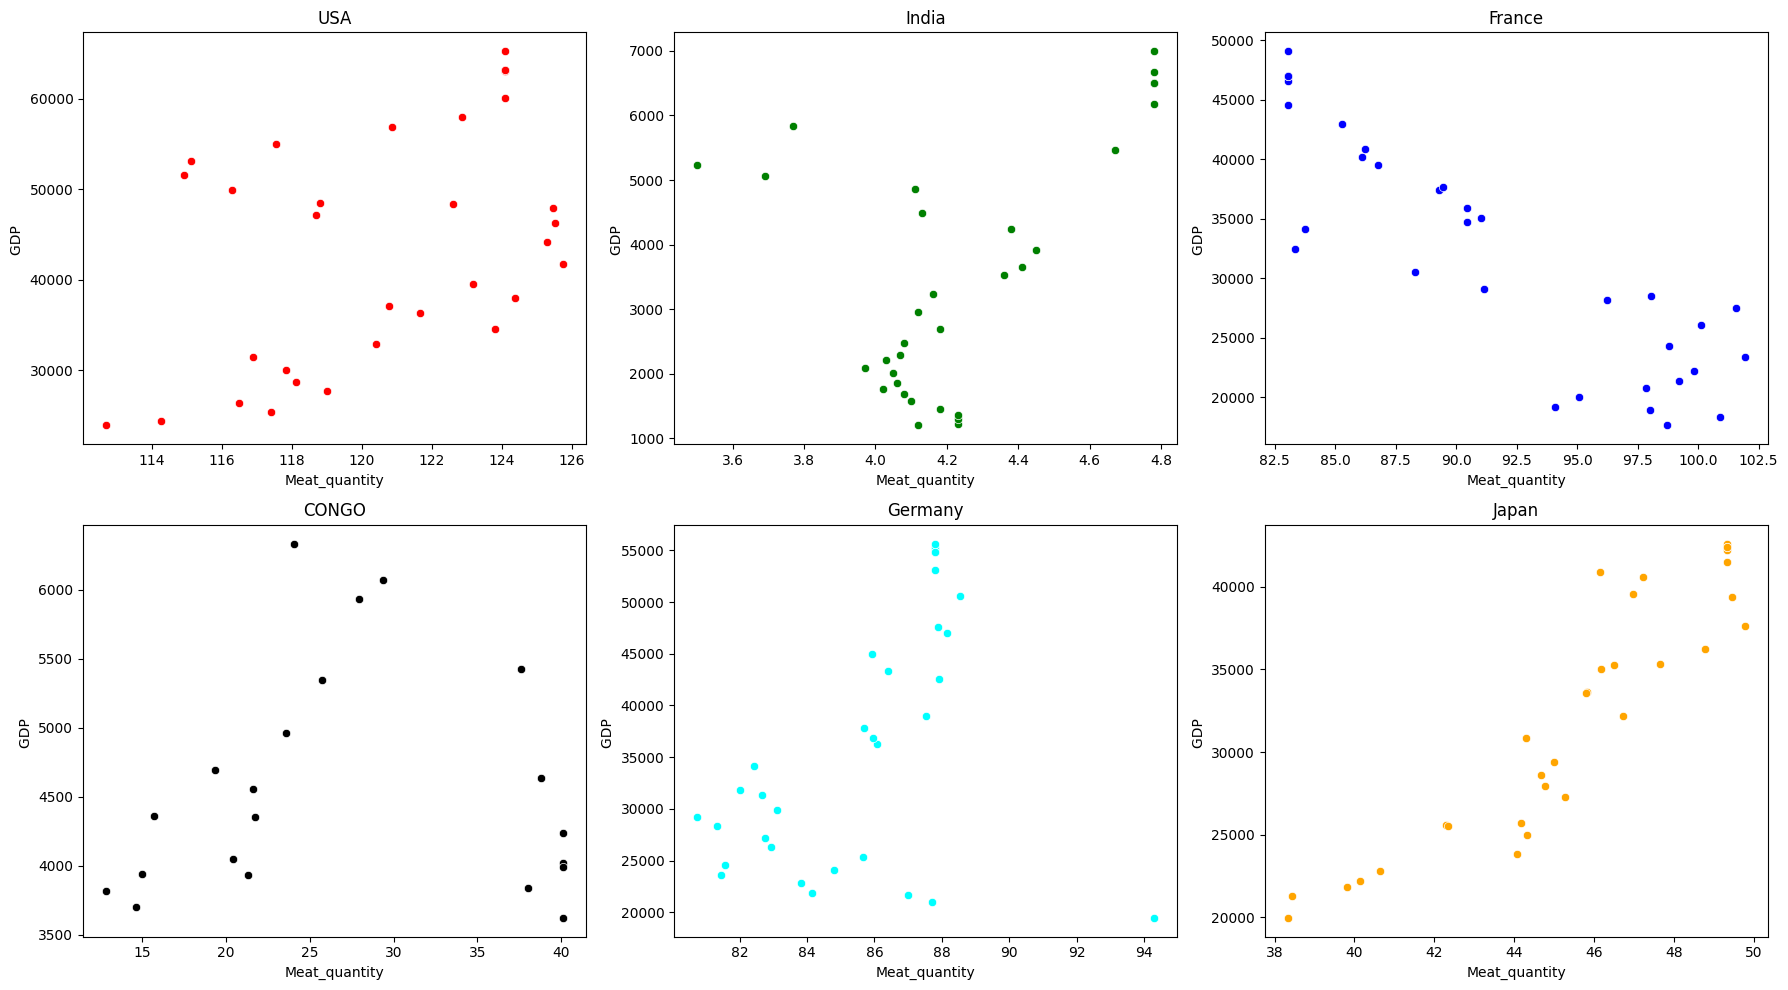

In [15]:
USA_data = data[data.Code == 'USA']
IND_data = data[data.Code == 'IND']
FRA_data = data[data.Code == 'FRA']
COG_data = data[data.Code == 'COG']
DEU_data = data[data.Code == 'DEU']
JPN_data = data[data.Code == 'JPN']

plt.rcParams["figure.figsize"] = [18.00, 10.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 3)
sns.scatterplot(data=USA_data, x="Meat_quantity", y="GDP ", color ="red",ax=axes[0][0]).set(title='USA')
sns.scatterplot(data=IND_data, x="Meat_quantity", y="GDP ", color ="green", ax=axes[0][1]).set(title='India')
sns.scatterplot(data=FRA_data, x="Meat_quantity", y="GDP ", color ="blue", ax=axes[0][2]).set(title='France')
sns.scatterplot(data=COG_data, x="Meat_quantity", y="GDP ", color ="black", ax=axes[1][0]).set(title='CONGO')
sns.scatterplot(data=DEU_data, x="Meat_quantity", y="GDP ", color ="cyan", ax=axes[1][1]).set(title='Germany')
sns.scatterplot(data=JPN_data, x="Meat_quantity", y="GDP ", color ="orange", ax=axes[1][2]).set(title='Japan')
plt.show()

There is no observable pattern in the data spanning across multiple countries, hence it is advisable to drop it as it won't be of much use going further.
#### Now just comparing the GDP with healthcare, crop yield and electricity 

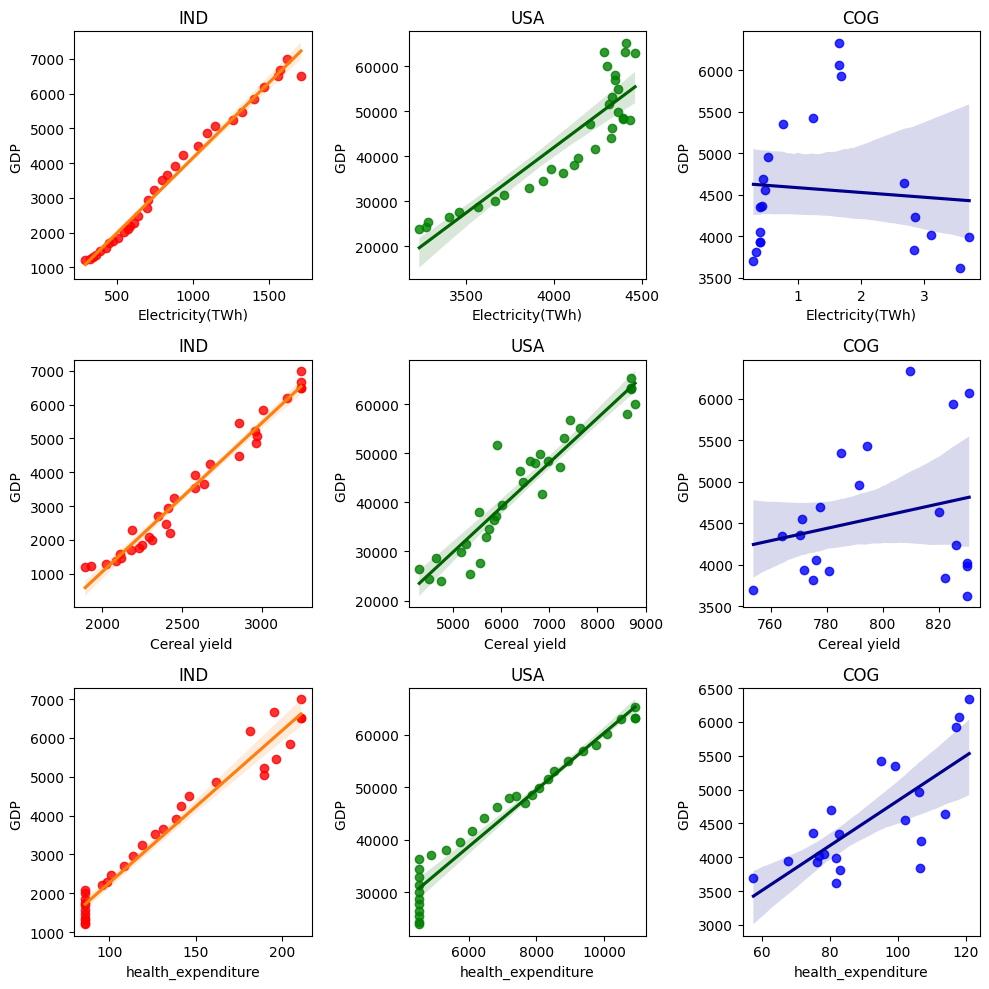

In [16]:
data = data.drop(['Meat_quantity'],axis =1)   ## droping meat coulumn

NEW_DATA = [USA_data,IND_data,COG_data]
NEW_DATA=pd.concat(NEW_DATA)
plt.rcParams["figure.figsize"] = [10, 10.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 3)
sns.regplot(x="Electricity(TWh)", y="GDP ", line_kws={"color": "C1"},color="red",data=IND_data,ax=axes[0][0]).set(title = "IND")
sns.regplot(x="Electricity(TWh)", y="GDP ",line_kws={"color": "darkgreen"},color="green",data=USA_data,ax=axes[0][1]).set(title = "USA")
sns.regplot(x="Electricity(TWh)", y="GDP ", line_kws={"color": "darkblue"},color="blue",data=COG_data,ax=axes[0][2]).set(title = "COG")
sns.regplot(x="Cereal yield ", y="GDP ",line_kws={"color": "C1"},color="red", data=IND_data,ax=axes[1][0]).set(title = "IND")
sns.regplot(x="Cereal yield ", y="GDP ", line_kws={"color": "darkgreen"},color="green", data=USA_data,ax=axes[1][1]).set(title = "USA")
sns.regplot(x="Cereal yield ", y="GDP ", line_kws={"color": "darkblue"},color="blue",data=COG_data,ax=axes[1][2]).set(title = "COG")
sns.regplot(x="health_expenditure", y="GDP ",line_kws={"color": "C1"},color="red", data=IND_data,ax=axes[2][0]).set(title = "IND")
sns.regplot(x="health_expenditure", y="GDP ",  line_kws={"color": "darkgreen"},color="green",data=USA_data,ax=axes[2][1]).set(title = "USA")
sns.regplot(x="health_expenditure", y="GDP ", line_kws={"color": "darkblue"},color="blue",data=COG_data,ax=axes[2][2]).set(title = "COG")


plt.show()


- We can observe a similar trend in electricity to GDP in India and USA but not in Congo
- The same can be extended to Cerela yield as we can observe a similar trend for GDP in India and USA but not in Congo
- We can observe a similar trend in healthcare expense to GDP in India, USA and Congo.

### PCA
Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity.

        PCA1      PCA2         Entity
0   1.260753  2.062548  United States
1   1.255880  1.956583  United States
2   1.465920  1.849446  United States
3   1.328532  1.740481  United States
4   1.621542  1.631844  United States
5   1.507874  1.522047  United States
6   1.658379  1.409061  United States
7   1.720770  1.292169  United States
8   1.892748  1.192587  United States
9   1.994249  1.089631  United States
10  2.073390  0.971411  United States
11  2.123924  0.847176  United States
12  2.204333  0.745991  United States
13  2.376016  0.621760  United States
14  2.668449  0.509544  United States
15  2.720634  0.390527  United States
16  2.817132  0.269035  United States
17  2.983699  0.152398  United States
18  2.974366  0.026670  United States
19  3.018880 -0.106111  United States
20  3.088580 -0.214197  United States
21  3.091031 -0.341154  United States
22  2.985681 -0.465858  United States
23  3.300952 -0.585910  United States
24  3.490533 -0.700221  United States
25  3.580129

Text(0, 0.5, 'PCA 2')

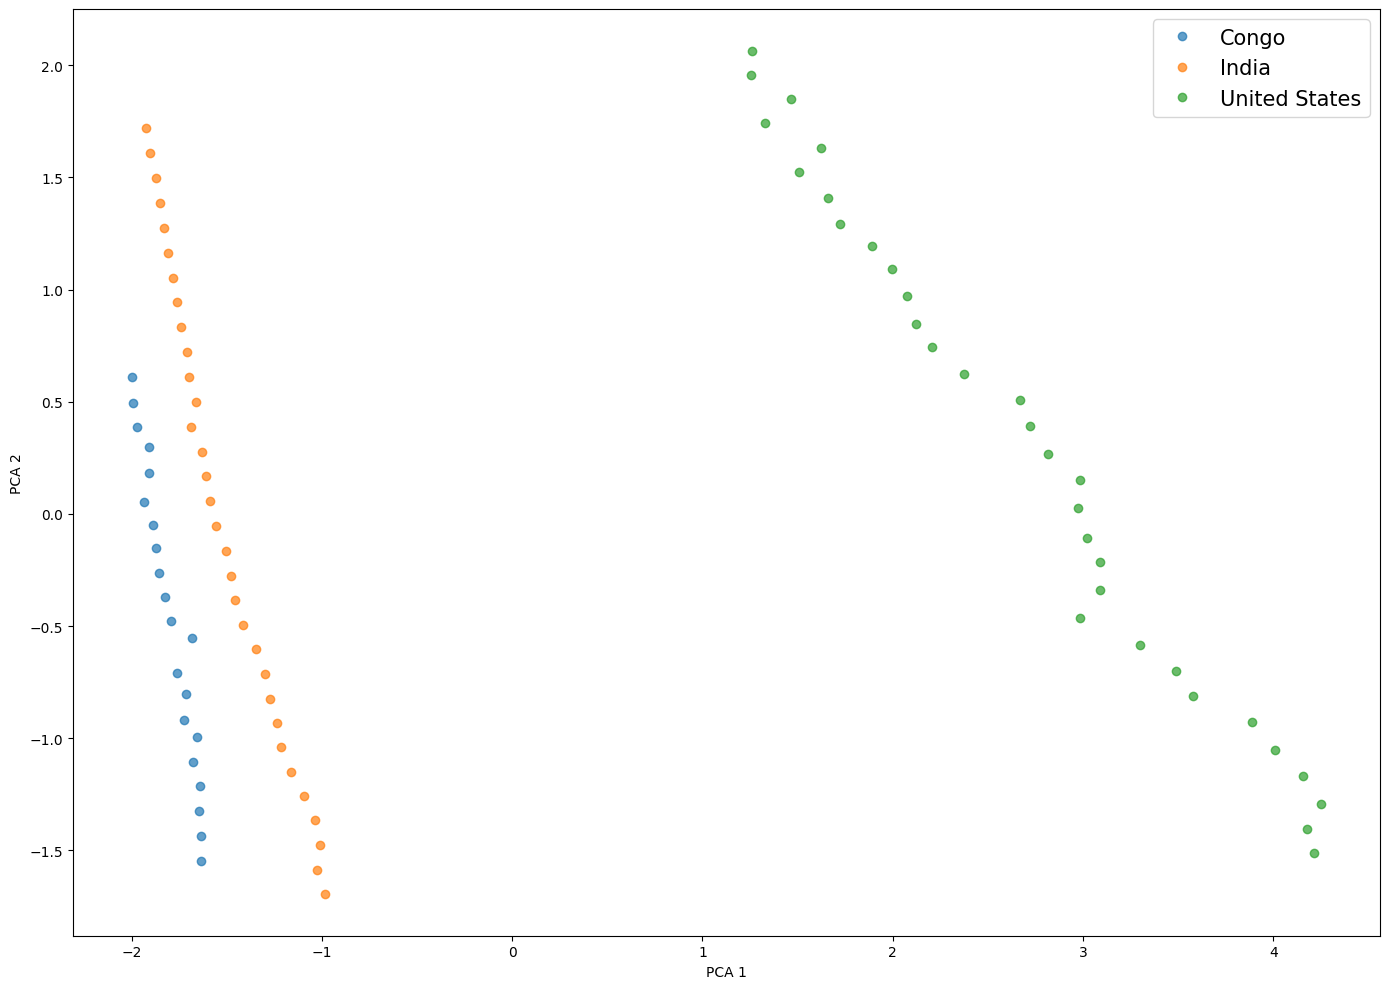

In [ ]:
#normalizing the data
country = NEW_DATA.loc[:,'Entity']
country = country.reset_index()
country = country.drop(['index'],axis =1)   
country
data1 = NEW_DATA.drop(['Entity','Code'],axis =1)
standard_data = StandardScaler().fit_transform(data1)
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])
finalDf = pd.concat([principalDf, country], axis = 1)
print(finalDf)
for key, group in finalDf.groupby(['Entity']):
    plt.plot(group.PCA1, group.PCA2, 'o', alpha=0.7, label=key)
    plt.legend(loc=0, fontsize=15)
plt.margins(0.05)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

- After plotting all 3 categories into two PCA variables and then ploting chart
- It shows PCA 1 value for US is above average where as India and congo are below average. 
- The 2nd PCA value looks similar for these countries as well.  

## SUMMARY

In [17]:
profile = ProfileReport(data, title ="Summary of Dataset", explorative =True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\neera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig(
C:\Users\neera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig(


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]